### My Video on General Steps to run API
https://www.youtube.com/watch?v=KsU01Kfpejg

## Welcome !

In [1]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Less Important
import missingno as msno
from scipy import stats
import joblib
import os

## Sklearn
from sklearn import utils

## Preprocessig
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

## Algorithms
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Loading the Data and Look at the big Picture

In [2]:
## load the CSV file
df_data = pd.read_csv('Job titles and industries.csv')
df_data.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


### Cleaning

In [3]:
## test if there is null values and look at the datatypes
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  8586 non-null   object
 1   industry   8586 non-null   object
dtypes: object(2)
memory usage: 134.3+ KB


In [4]:
df_data.describe() ## describe the data

,job title,industry
count,8586,8586
unique,3890,4
top,marketing executive,IT
freq,91,4746


In [5]:
df_data['job title'].value_counts()

marketing executive                                           91
php developer                                                 54
trainee network technician                                    53
software developer                                            53
marketing manager                                             49
                                                              ..
digital designer - ux/ui                                       1
digital marketing executive - restaurant chain                 1
marketing and creative manager - salary circa £50k - poole     1
data analyst, sql, ecommerce, central london - £45k            1
creative copywriter (arabic/english)                           1
Name: job title, Length: 3890, dtype: int64

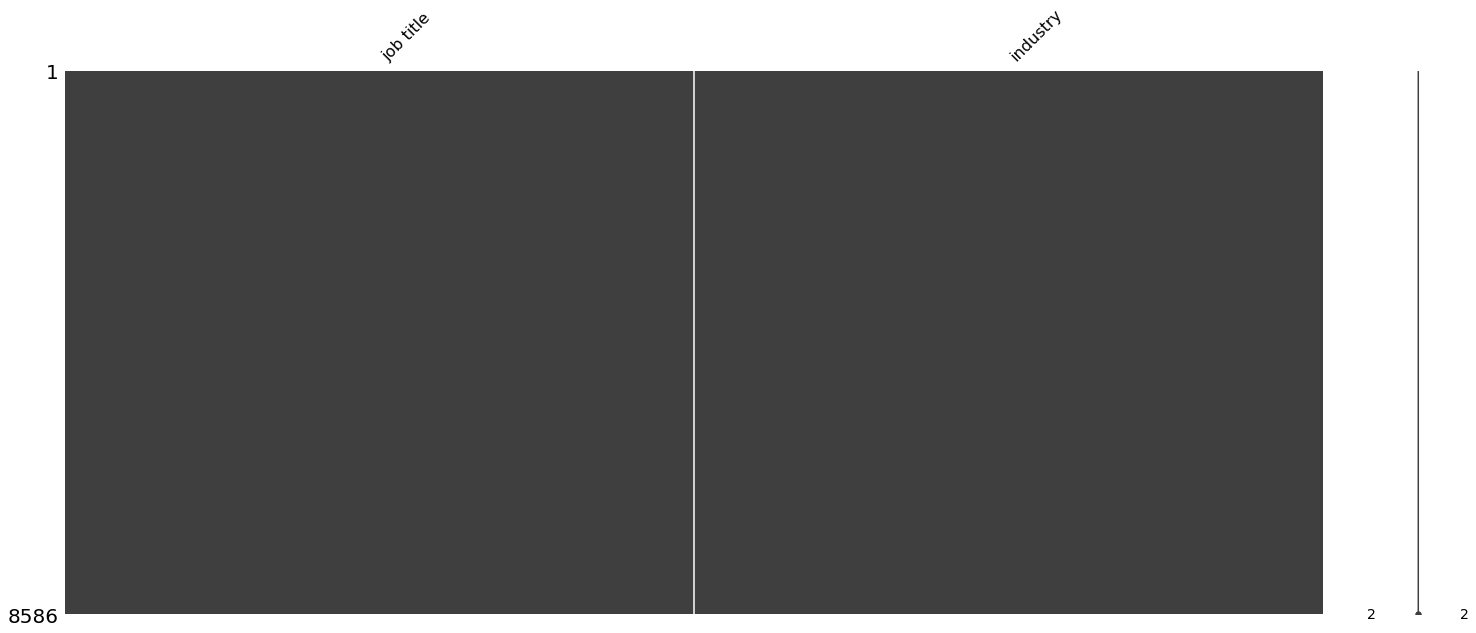

In [6]:
msno.matrix(df_data);  ## check again  ==> seems Good

### EDA and Preprocessing

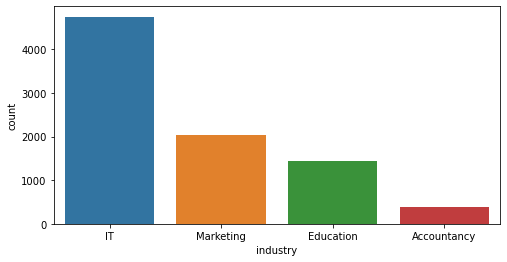

In [7]:
## look at the countplot of target
plt.figure(figsize=(8, 4))
sns.countplot(x='industry', data=df_data);    ## implance output

### Split the data Using StratifiedShuffleSplit

In [8]:
## split the data for train_full & test
split_data_all = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
gen_split_all = split_data_all.split(df_data, df_data['industry'])
## loop over the generator
for train_full_idx, test_full_idx in gen_split_all:
    train_set_full = df_data.iloc[train_full_idx]
    test_set = df_data.iloc[test_full_idx]


## split the data for train and Validation 
split_train = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
gen_split_train = split_train.split(train_set_full, train_set_full['industry'])
## loop over the generator
for train_idx, val_idx in gen_split_train:
    train_set = train_set_full.iloc[train_idx]
    val_set = train_set_full.iloc[val_idx]

In [9]:
## check
print('df_data total shape =>', df_data.shape)
print('=='*15)
print('train_set_full shape =>', train_set_full.shape)
print('=='*15)
print('train_set shape =>', train_set.shape)
print('=='*15)
print('val_set shape =>', val_set.shape)
print('=='*15)
print('test_set shape =>', test_set.shape)

df_data total shape => (8586, 2)
train_set_full shape => (6868, 2)
train_set shape => (5494, 2)
val_set shape => (1374, 2)
test_set shape => (1718, 2)


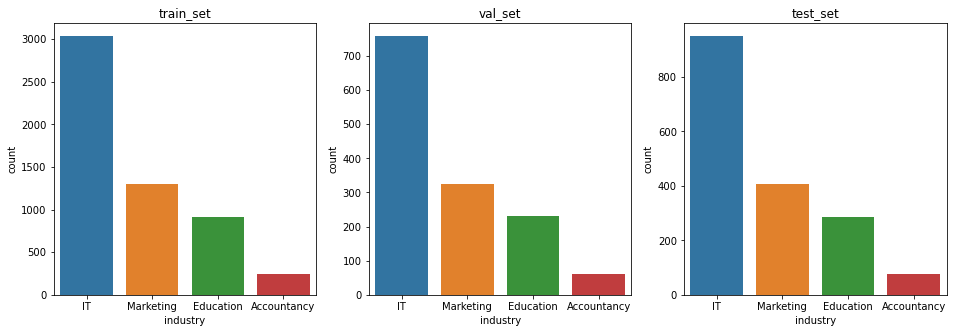

In [10]:
## check my work 
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

plt.sca(ax[0])
sns.countplot(x='industry', data=train_set, order=train_set['industry'].value_counts().index)
plt.title('train_set')

plt.sca(ax[1])
sns.countplot(x='industry', data=val_set, order=val_set['industry'].value_counts().index)
plt.title('val_set')

plt.sca(ax[2])
sns.countplot(x='industry', data=test_set, order=test_set['industry'].value_counts().index)
plt.title('test_set')
   
plt.show()    ## Seems Exact what i want

### Preprocessing

In [11]:
## separate Feature and Label
X_train = train_set['job title']
y_train = train_set['industry']

X_val = val_set['job title']
y_val = val_set['industry']

X_test = test_set['job title']
y_test = test_set['industry']

## CountVectorizer for (train, val, test)
vect = TfidfVectorizer()
X_train_final = vect.fit_transform(X_train)
X_val_final = vect.transform(X_val)
X_test_final = vect.transform(X_test)

In [12]:
X_train_final

<5494x1700 sparse matrix of type '<class 'numpy.float64'>'
	with 20551 stored elements in Compressed Sparse Row format>

### Model Training 
#### `I will choose (Accuracy) as my Metric`

In [13]:
## solve the proplem of imbalanced data
my_weights = 1 - y_train.value_counts(normalize=True)
## create the dict
my_class_weights = {'IT':my_weights[0], 'Marketing':my_weights[1], 
                    'Education':my_weights[2], 'Accountancy':my_weights[3]}

my_class_weights

{'IT': 0.447215143793229,
 'Marketing': 0.7633782307972333,
 'Education': 0.8329086275937386,
 'Accountancy': 0.956497997815799}

`Screen from (Hands on ML)`

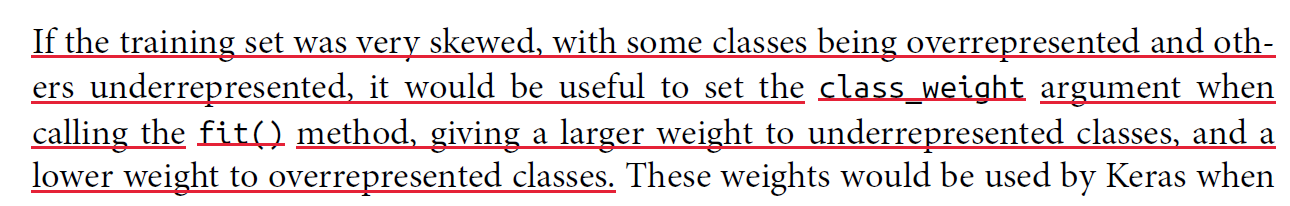

##### `try MultinomialNB`

In [14]:
## Define alg
naive_clf = MultinomialNB()
naive_clf.fit(X_train_final, y_train)

## predict for training set
pred_train_naive = naive_clf.predict(X_train_final)

## predict for validation set
pred_val_naive = naive_clf.predict(X_val_final)

###################### check Accuracy
## for training
train_acc_naive = sum(y_train==pred_train_naive)/len(pred_train_naive)
print('train_acc_naive =>', train_acc_naive)

print()
## for validation
val_acc_naive = sum(y_val==pred_val_naive)/len(pred_val_naive)
print('val_acc_naive =>', val_acc_naive)

### seems Good! Not Bad

train_acc_naive => 0.9359301055697125

val_acc_naive => 0.8995633187772926


##### `try Logistic Regression`

In [15]:
## Define alg
logist_clf = LogisticRegression(penalty='l2', class_weight=my_class_weights, random_state=42)
logist_clf.fit(X_train_final, y_train)

## predict for training set
pred_train_logist = logist_clf.predict(X_train_final)

## predict for validation set
pred_val_logist = logist_clf.predict(X_val_final)

###################### check Accuracy
## for training
train_acc_logist = sum(y_train==pred_train_logist)/len(pred_train_logist)
print('train_acc_logist =>', train_acc_logist)

print()
## for validation
val_acc_logist = sum(y_val==pred_val_logist)/len(pred_val_logist)
print('val_acc_logist =>', val_acc_logist)   ## High Accuracy 

train_acc_logist => 0.9526756461594467

val_acc_logist => 0.9206695778748181


##### `try RandomForest`

In [16]:
## Define alg
forest_clf = RandomForestClassifier(n_estimators=400, max_depth=25, 
                                    class_weight=my_class_weights, random_state=42, )  ## initial
forest_clf.fit(X_train_final, y_train)

## predict for training set
pred_train_forest = forest_clf.predict(X_train_final)

## predict for validation set
pred_val_forest = forest_clf.predict(X_val_final)

###################### check Accuracy
## for training
train_acc_forest = sum(y_train==pred_train_forest)/len(pred_train_forest)
print('train_acc_forest =>', train_acc_forest)

print()
## for validation
val_acc_forest = sum(y_val==pred_val_forest)/len(pred_val_forest)
print('val_acc_forest =>', val_acc_forest)   
## Need much Tuning 

train_acc_forest => 0.9166363305424099

val_acc_forest => 0.8791848617176128


##### `try LinearSVC`

In [17]:
## Define alg

## I tuned and place the best params to rapid the code runing
## after tuning C=1.0, loss='hinge'
svc_clf = LinearSVC(loss='hinge', C=1, max_iter=100000, 
                    class_weight=my_class_weights, random_state=42)  
svc_clf.fit(X_train_final, y_train)

## predict for training set
pred_train_svc = svc_clf.predict(X_train_final)

## predict for validation set
pred_val_svc = svc_clf.predict(X_val_final)

###################### check Accuracy
## for training
train_acc_svc = sum(y_train==pred_train_svc)/len(pred_train_svc)
print('train_acc_svc =>', train_acc_svc)

print()
## for validation
val_acc_svc = sum(y_val==pred_val_svc)/len(pred_val_svc)
print('val_acc_svc =>', val_acc_svc)  

train_acc_svc => 0.961412449945395

val_acc_svc => 0.9301310043668122


In [18]:
### LinearSVC Tuning

## Try Tuning by GridSearchCV , sequentially ==> i update the searching area
# params_best_svc = {'C': np.arange(0.01, 5, 0.01),
#                    'loss': ['hinge', 'squared_hinge']}

# grid_svc = GridSearchCV(estimator=svc_clf, param_grid=params_best_svc, 
#                         cv=5, scoring='accuracy', n_jobs=-1)

# grid_svc.fit(X_train_final, y_train)

# grid_svc.best_params_

##### `try Xgboost`

In [19]:
## Define alg
xgb_clf = xgb.XGBClassifier(objective='multi:softmax')
xgb_clf.fit(X_train_final, y_train)

## predict for training set
pred_train_xgb = xgb_clf.predict(X_train_final)

## predict for validation set
pred_val_xgb = xgb_clf.predict(X_val_final)

###################### check Accuracy
## for training
train_acc_xgb = sum(y_train==pred_train_xgb)/len(pred_train_xgb)
print('train_acc_xgb =>', train_acc_xgb)

print()
## for validation
val_acc_xgb = sum(y_val==pred_val_xgb)/len(pred_val_xgb)
print('val_acc_xgb =>', val_acc_xgb)  

C:\Users\moham\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:43:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train_acc_xgb => 0.9635966508918821

val_acc_xgb => 0.9163027656477438


### I will use svc_clf (LinearSVC) ==> the Highest Accuracy and less Tuning

### Evaluation on test_set

In [20]:
best_models = [naive_clf, logist_clf, forest_clf, svc_clf, xgb_clf]

for clf in best_models:

    y_pred_each_clf = clf.predict(X_test_final)
    acc_test_each_clf = sum(y_test==y_pred_each_clf)/len(y_pred_each_clf)
    print(clf.__class__.__name__, " ====>", 'Accuracy =', acc_test_each_clf)
    print('==='*25)  
    
### LinearSVC is theBest

MultinomialNB  ====> Accuracy = 0.9074505238649593
LogisticRegression  ====> Accuracy = 0.9225844004656577
RandomForestClassifier  ====> Accuracy = 0.8870779976717112
LinearSVC  ====> Accuracy = 0.9324796274738067
XGBClassifier  ====> Accuracy = 0.9179278230500582


In [21]:
### final prediction over the test_set
y_pred_test = svc_clf.predict(X_test_final)
y_pred_test

array(['IT', 'IT', 'IT', ..., 'IT', 'IT', 'Marketing'], dtype=object)

### Save the Best Models

In [22]:
joblib.dump(svc_clf, 'svc_clf.pkl')

['svc_clf.pkl']

### In case of New Instances on API

In [23]:
## this function is made only for API , 
## so when a new instance is entered it passes through the same process steps
def vectorize_new_instance(X_new):
    ''' this function tries to get the required input to the Model
    Args:
    *****
        (X_new : 1D array of String) ==> the required instance to predict
    '''
    X_new_final = vect.transform(X_new)

    return X_new_final

## Resources

##### `Books `
1. Hands on ML  (by Aurilien Geron)
2. Deep Learning with Python (by Francois Chollet 'Autour of Keras')

##### `Links `
vectorize TrobleShoot  <br />
https://datascience.stackexchange.com/questions/30620/python-sklearn-tfidfvectorizer-feature-not-matching-delete

##### `Flask API `

1. https://github.com/krishnaik06/Deployment-flask.git

2. https://www.youtube.com/watch?v=UbCWoMf80PY

3. https://www.youtube.com/watch?v=MxJnR1DMmsY

## By / Mohammed Agoor 

Sunday `19/9/2021`